In [4]:

from google.colab import drive
drive.mount('/content/drive')

folder = '/content/drive/MyDrive/Colab Notebooks/1s'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# !pip install pandas
# !pip install numpy
# !pip install seaborn
# !pip install matplotlib
# !pip install xgboost
# !pip install lightgbm
# !pip install sklearn
!pip install graphviz

# 라이브러리 임포트
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import xgboost
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, RidgeCV, RidgeClassifier
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix

import warnings
warnings.filterwarnings('ignore')


# EDA

## 변수 설명
  - **int_rate** : 대출자에 부여된 이자율 (Interest rate of the loan the applicant received)
  - **annual_inc** : 연 소득 (annual income)
  - **dti** : 소득 대비 부채 비율 (Debt-to-income ratio)
  - **delinq_2yrs** : 지난 2년 간 체납 발생 횟수 (Delinquencies on lines of credit in the last 2 years)
  - **inq_last_6mths** : 지난 6개월 간 신용 조회 수 (Inquiries into the applicant's credit during the last 6 months)
  - **pub_rec** : 파산 횟수 (Number of bankruptcies listed in the public record)
  - **revol_bal** : 리볼빙 잔액 (Total credit revolving balance)
  - **total_acc** : 지금까지 소유했던 신용카드 개수 (num_total_cc_accounts : Total number of credit card accounts in the applicant's history)
  - **collections_12_mths_ex_med** : 의료부문을 제외한 지난 12개월 간 추심 발생 횟수 (num_collections_last_12m : Number of collections in the last 12 months. This excludes medical collections)
  - **acc_now_delinq** : 대출자가 체납 상태에 있지 않은 계좌의 수 (The number of accounts on which the borrower is now delinquent)
  - **tot_coll_amt** : 대출자에 대한 현재까지의 총 추심액 (total_collection_amount_ever : The total amount that the applicant has had against them in collections)
  - **tot_cur_bal** : 전 계좌의 현재 통합 잔고 (Total current balance of all accounts)
  - **chargeoff_within_12_mths** : 대출 부 신청인의 대출 신청 직전 12개월 간 세금 공제 횟수 (Number of charge-offs within last 12 months at time of application for the secondary applicant)
  - **delinq_amnt** : 체납 금액 (delinquency amount)
  - **tax_liens** : 세금 저당권의 수 (Number of tax liens)
  - **emp_length1 ~ 12** : 고용 연수 (Number of years in the job)
  - **home_ownership1 ~ 6** : 대출 신청자의 주거 소유 형태 (The ownership status of the applicant's residence)
  - **verification_status1 ~ 3** : 공동 소득 발생 여부 및 형태 (verification_income_joint : Type of verification of the joint income)
  - **purpose1 ~ 14** : 대출 목적 (The purpose of the loan)
  - **initial_list_status1 ~ 2** : 최초 대출 상태 (Initial listing status of the loan)
  - **mths_since_last_delinq1 ~ 11** : 마지막 체납이 지금으로부터 몇개월 전에 있었는지를 나타내는 변수 (Months since the last delinquency)
  
  - **funded_amnt** : 대출액 (Funded amount)
  - **funded_amnt_inv** : 사채 대출액 (Funded amount by investors)
  - **total_rec_late_fee** : 총 연체료 중 납부액 (Late fees received to date)
  - **term1** : 상환 기간 (The number of payments on the loan. Values are in months and can be either 36 or 60)
  - **open_acc** : 개설 개좌 수 (The number of open credit lines in the borrower's credit file)
  - **installment** : 대출 발생 시 월 상환액 (The monthly payment owed by the borrower if the loan originates)
  - **revol_util** : 리볼빙 한도 대비 리볼빙 사용 비율 (Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit)
  - **out_prncp** : 대출액 중 원리금 잔액 (Remaining outstanding principal for total amount funded)
  - **out_prncp_inv** : 사채 대출액 중 원리금 잔액 (Remaining outstanding principal for total amount funded by investors)
  - **total_rec_int** : 이자 상환액 (Interest received to date)
  - **fico_range_low** : FICO(일종의 신용점수) 최저값 (The lower boundary range the borrower’s FICO at loan origination belongs to)
  - **fico_range_high** : FICO(일종의 신용점수) 최고값 (The upper boundary range the borrower’s FICO at loan origination belongs to)
  
  - **depvar** : 고객의 부도 여부 (dependent variable)

In [7]:
# df = pd.read_csv('/content/drive/MyDrive/train.csv')
df = pd.read_csv(os.path.join(folder, 'train.csv'))
df.head(20)

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,emp_length10,emp_length11,emp_length12,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar
0,0.0824,21000.00,29.19,0,1,0,3016,26,0,0,0,11773,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1200,1200.0,0.0,1,18,37.74,0.076,0.0,0.0,157.94,765,769,0
1,0.1299,80000.00,4.82,0,1,1,5722,24,0,0,0,21875,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,8000,8000.0,0.0,1,8,269.52,0.447,0.0,0.0,1702.42,665,669,0
2,0.1299,38000.00,23.66,0,3,0,6511,18,0,0,0,31868,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,5000,5000.0,0.0,1,7,168.45,0.880,0.0,0.0,1066.64,670,674,0
3,0.1367,100000.00,16.27,4,2,0,6849,30,0,0,0,326049,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,15000,15000.0,0.0,1,12,510.27,0.457,0.0,0.0,1256.24,680,684,1
4,0.1269,30000.00,25.28,0,1,2,8197,12,0,0,2506,8840,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,10000,10000.0,0.0,1,8,335.45,0.416,0.0,0.0,871.04,660,664,1
5,0.1318,90000.00,3.48,7,0,0,2903,31,0,0,0,19548,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,7000,7000.0,0.0,1,7,236.47,0.854,0.0,0.0,1330.30,660,664,0
6,0.0791,60000.00,17.34,0,0,0,20399,35,0,0,0,117320,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,20000,20000.0,0.0,1,18,625.90,0.369,0.0,0.0,2567.44,750,754,0
7,0.0975,79600.00,15.97,3,0,1,6481,17,0,0,0,18757,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,23800,23800.0,0.0,1,7,765.17,0.745,0.0,0.0,3006.76,680,684,0
8,0.0789,150000.00,7.36,1,0,0,15827,38,0,0,543,367504,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,16000,16000.0,0.0,1,19,500.58,0.334,0.0,0.0,1286.38,665,669,0
9,0.0999,95000.00,25.78,0,1,0,17870,37,0,0,0,273776,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,8000,8000.0,0.0,1,24,258.10,0.764,0.0,0.0,796.59,665,669,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   int_rate                    100000 non-null  float64
 1   annual_inc                  100000 non-null  float64
 2   dti                         100000 non-null  float64
 3   delinq_2yrs                 100000 non-null  int64  
 4   inq_last_6mths              100000 non-null  int64  
 5   pub_rec                     100000 non-null  int64  
 6   revol_bal                   100000 non-null  int64  
 7   total_acc                   100000 non-null  int64  
 8   collections_12_mths_ex_med  100000 non-null  int64  
 9   acc_now_delinq              100000 non-null  int64  
 10  tot_coll_amt                100000 non-null  int64  
 11  tot_cur_bal                 100000 non-null  int64  
 12  chargeoff_within_12_mths    100000 non-null  int64  
 13  delinq_amnt    

In [9]:
df.describe()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,emp_length10,emp_length11,emp_length12,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.130833,7.436061e+04,18.514508,0.343700,0.668880,0.235720,16090.202820,24.675910,0.018810,0.005800,250.588120,1.305281e+05,0.009630,19.288330,0.063820,0.065400,0.326240,0.089410,0.08058,0.059480,0.060710,0.046640,0.045320,0.045690,0.038570,0.075550,0.066410,0.000330,0.466120,0.000070,0.000050,0.110880,0.422550,0.321800,0.390200,0.288000,0.009620,0.226720,0.582810,0.0,0.060400,0.004250,0.019830,0.01101,0.007310,0.058200,0.000650,0.011250,0.007070,0.000880,0.434430,0.565570,0.489320,0.052360,0.060090,0.045700,0.050750,0.048560,0.051340,0.053430,0.048960,0.050030,0.049460,13735.317750,13729.341073,2.448885e+00,0.855920,11.620700,434.077648,0.537233,0.253327,0.253259,2491.282802,692.630550,696.630660,0.325690
std,0.044773,7.467409e+04,8.413049,0.905007,0.952044,0.661468,21569.939271,11.883834,0.150321,0.083585,2042.770881,1.503326e+05,0.110079,893.304366,0.468027,0.247232,0.468839,0.285336,0.27219,0.236522,0.238799,0.210868,0.208006,0.208813,0.192569,0.264278,0.248999,0.018163,0.498853,0.008366,0.007071,0.313985,0.493968,0.467169,0.487797,0.452833,0.097609,0.418712,0.493097,0.0,0.238228,0.065054,0.139417,0.10435,0.085186,0.234122,0.025487,0.105468,0.083786,0.029652,0.495684,0.495684,0.499888,0.222753,0.237655,0.208835,0.219488,0.214947,0.220691,0.224891,0.215786,0.218008,0.216828,8464.825314,8461.694483,1.489496e+01,0.351173,5.458774,265.921746,0.239373,18.053290,18.051746,2706.262200,29.668017,29.668584,0.468634
min,0.053200,5.360000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,

In [10]:
# 결측치 확인
pd.DataFrame(df.isnull().sum()).rename(columns={0:'Non-Null Count'}).T

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,emp_length10,emp_length11,emp_length12,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar
Non-Null Count,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
# 라벨(depvar) 비율 확인
print('y=1 ratio :', df.depvar.sum()/len(df))

y=1 ratio : 0.32569


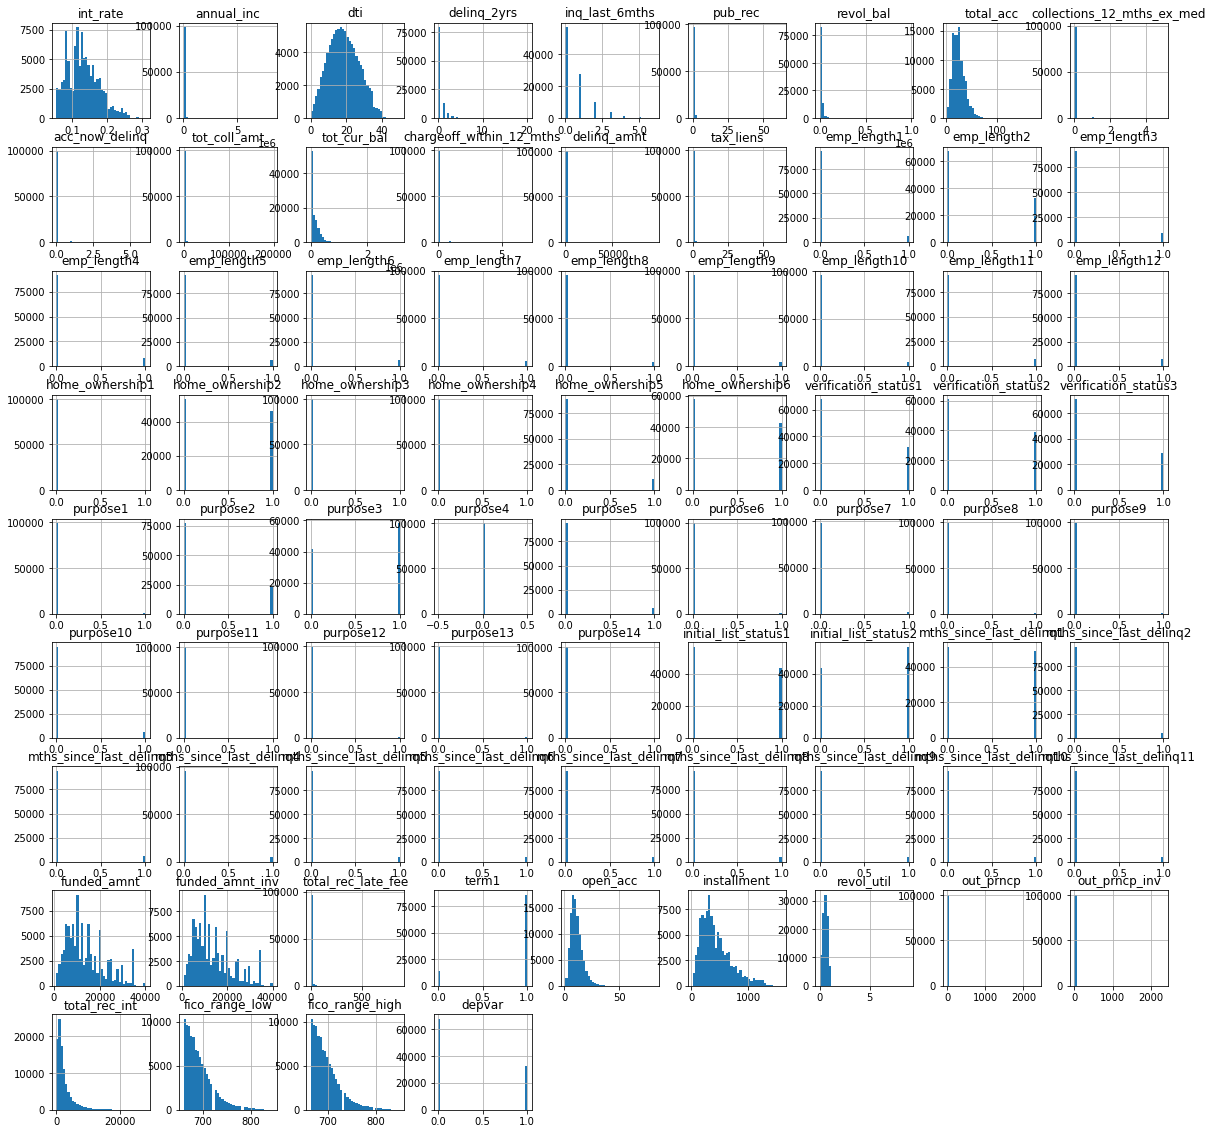

In [ ]:
df.hist(bins=40 , figsize=(20,20)) #Pandas Hist function
plt.show()

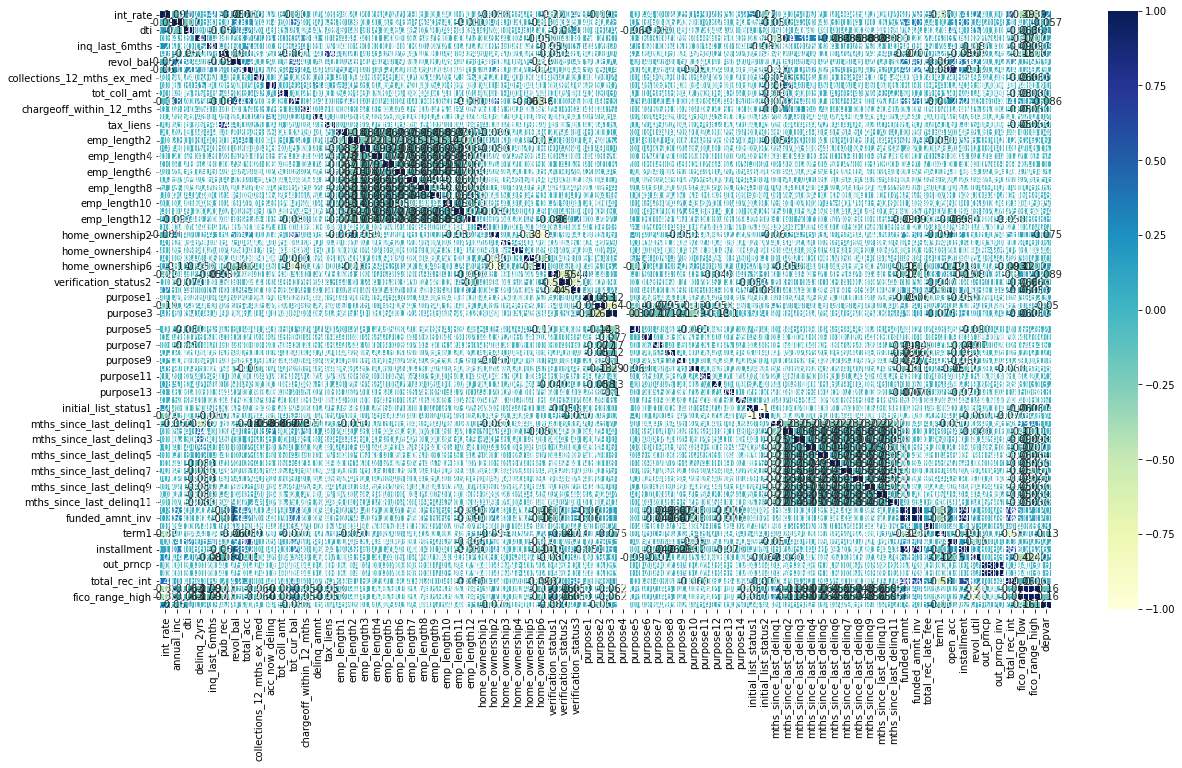

In [ ]:
corr = df.corr()
plt.figure(figsize=(20,11))
ax = sns.heatmap(corr,cmap="YlGnBu", linewidths=.5, annot=True )
plt.yticks(rotation=0)
plt.show()

In [12]:
df.columns

Index(['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'emp_length1',
       'emp_length2', 'emp_length3', 'emp_length4', 'emp_length5',
       'emp_length6', 'emp_length7', 'emp_length8', 'emp_length9',
       'emp_length10', 'emp_length11', 'emp_length12', 'home_ownership1',
       'home_ownership2', 'home_ownership3', 'home_ownership4',
       'home_ownership5', 'home_ownership6', 'verification_status1',
       'verification_status2', 'verification_status3', 'purpose1', 'purpose2',
       'purpose3', 'purpose4', 'purpose5', 'purpose6', 'purpose7', 'purpose8',
       'purpose9', 'purpose10', 'purpose11', 'purpose12', 'purpose13',
       'purpose14', 'initial_list_status1', 'initial_list_status2',
       'mths_since_last_delinq1', 'mths_since_last_delinq2',
       'mths_since_l

In [20]:
# ['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
#        'pub_rec', 'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
#        'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
#        'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'emp_length1',
#        'emp_length2', 'emp_length3', 'emp_length4', 'emp_length5',
#        'emp_length6', 'emp_length7', 'emp_length8', 'emp_length9',
#        'emp_length10', 'emp_length11', 'emp_length12', 'home_ownership1',
#        'home_ownership2', 'home_ownership3', 'home_ownership4',
#        'home_ownership5', 'home_ownership6', 'verification_status1',
#        'verification_status2', 'verification_status3', 'purpose1', 'purpose2',
#        'purpose3', 'purpose4', 'purpose5', 'purpose6', 'purpose7', 'purpose8',
#        'purpose9', 'purpose10', 'purpose11', 'purpose12', 'purpose13',
#        'purpose14', 'initial_list_status1', 'initial_list_status2',
#        'mths_since_last_delinq1', 'mths_since_last_delinq2',
#        'mths_since_last_delinq3', 'mths_since_last_delinq4',
#        'mths_since_last_delinq5', 'mths_since_last_delinq6',
#        'mths_since_last_delinq7', 'mths_since_last_delinq8',
#        'mths_since_last_delinq9', 'mths_since_last_delinq10',
#        'mths_since_last_delinq11', 'funded_amnt', 'funded_amnt_inv',
#        'total_rec_late_fee', 'term1', 'open_acc', 'installment', 'revol_util',
#        'out_prncp', 'out_prncp_inv', 'total_rec_int', 'fico_range_low',
#        'fico_range_high', 'depvar']
dfvis1= df.drop(['emp_length1',
       'emp_length2', 'emp_length3', 'emp_length4', 'emp_length5',
       'emp_length6', 'emp_length7', 'emp_length8', 'emp_length9',
       'emp_length10', 'emp_length11', 'emp_length12', 'home_ownership1',
       'home_ownership2', 'home_ownership3', 'home_ownership4',
       'home_ownership5', 'home_ownership6', 'verification_status1',
       'verification_status2', 'verification_status3', 'purpose1', 'purpose2',
       'purpose3', 'purpose4', 'purpose5', 'purpose6', 'purpose7', 'purpose8',
       'purpose9', 'purpose10', 'purpose11', 'purpose12', 'purpose13',
       'purpose14', 'initial_list_status1', 'initial_list_status2',
       'mths_since_last_delinq1', 'mths_since_last_delinq2',
       'mths_since_last_delinq3', 'mths_since_last_delinq4',
       'mths_since_last_delinq5', 'mths_since_last_delinq6',
       'mths_since_last_delinq7', 'mths_since_last_delinq8',
       'mths_since_last_delinq9', 'mths_since_last_delinq10',
       'mths_since_last_delinq11', 'funded_amnt', 'funded_amnt_inv',
       'total_rec_late_fee', 'term1', 'open_acc', 'installment', 'revol_util',
       'out_prncp', 'out_prncp_inv', 'total_rec_int', 'fico_range_low',
       'fico_range_high'],axis=1)
dfvis2 = df.drop(['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens','purpose1', 'purpose2',
       'purpose3', 'purpose4', 'purpose5', 'purpose6', 'purpose7', 'purpose8',
       'purpose9', 'purpose10', 'purpose11', 'purpose12', 'purpose13',
       'purpose14', 'initial_list_status1', 'initial_list_status2',
       'mths_since_last_delinq1', 'mths_since_last_delinq2',
       'mths_since_last_delinq3', 'mths_since_last_delinq4',
       'mths_since_last_delinq5', 'mths_since_last_delinq6',
       'mths_since_last_delinq7', 'mths_since_last_delinq8',
       'mths_since_last_delinq9', 'mths_since_last_delinq10',
       'mths_since_last_delinq11', 'funded_amnt', 'funded_amnt_inv',
       'total_rec_late_fee', 'term1', 'open_acc', 'installment', 'revol_util',
       'out_prncp', 'out_prncp_inv', 'total_rec_int', 'fico_range_low',
       'fico_range_high'],axis=1)

dfvis3 = df.drop(['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'emp_length1',
       'emp_length2', 'emp_length3', 'emp_length4', 'emp_length5',
       'emp_length6', 'emp_length7', 'emp_length8', 'emp_length9',
       'emp_length10', 'emp_length11', 'emp_length12', 'home_ownership1',
       'home_ownership2', 'home_ownership3', 'home_ownership4',
       'home_ownership5', 'home_ownership6', 'verification_status1',
       'verification_status2', 'verification_status3','funded_amnt', 'funded_amnt_inv',
       'total_rec_late_fee', 'term1', 'open_acc', 'installment', 'revol_util',
       'out_prncp', 'out_prncp_inv', 'total_rec_int', 'fico_range_low',
       'fico_range_high'],axis=1)

dfvis4 = df.drop(['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'emp_length1',
       'emp_length2', 'emp_length3', 'emp_length4', 'emp_length5',
       'emp_length6', 'emp_length7', 'emp_length8', 'emp_length9',
       'emp_length10', 'emp_length11', 'emp_length12', 'home_ownership1',
       'home_ownership2', 'home_ownership3', 'home_ownership4',
       'home_ownership5', 'home_ownership6', 'verification_status1',
       'verification_status2', 'verification_status3', 'purpose1', 'purpose2',
       'purpose3', 'purpose4', 'purpose5', 'purpose6', 'purpose7', 'purpose8',
       'purpose9', 'purpose10', 'purpose11', 'purpose12', 'purpose13',
       'purpose14', 'initial_list_status1', 'initial_list_status2',
       'mths_since_last_delinq1', 'mths_since_last_delinq2',
       'mths_since_last_delinq3', 'mths_since_last_delinq4',
       'mths_since_last_delinq5', 'mths_since_last_delinq6',
       'mths_since_last_delinq7', 'mths_since_last_delinq8',
       'mths_since_last_delinq9', 'mths_since_last_delinq10',
       'mths_since_last_delinq11' ],axis=1)
dfvis1.head()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,depvar
0,0.0824,21000.0,29.19,0,1,0,3016,26,0,0,0,11773,0,0,0,0
1,0.1299,80000.0,4.82,0,1,1,5722,24,0,0,0,21875,0,0,0,0
2,0.1299,38000.0,23.66,0,3,0,6511,18,0,0,0,31868,0,0,0,0
3,0.1367,100000.0,16.27,4,2,0,6849,30,0,0,0,326049,0,0,0,1
4,0.1269,30000.0,25.28,0,1,2,8197,12,0,0,2506,8840,0,0,0,1


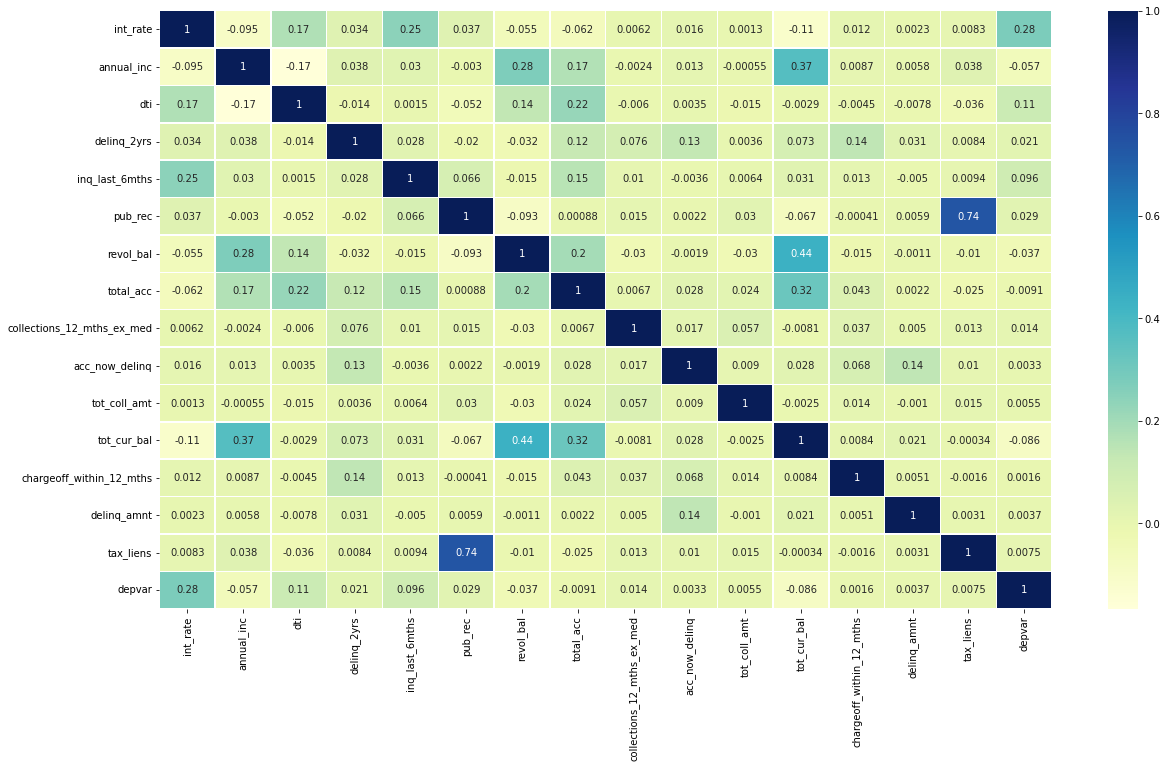

In [21]:
corr = dfvis1.corr()
plt.figure(figsize=(20,11))
ax = sns.heatmap(corr,cmap="YlGnBu", linewidths=.5, annot=True )
plt.yticks(rotation=0)
plt.show()

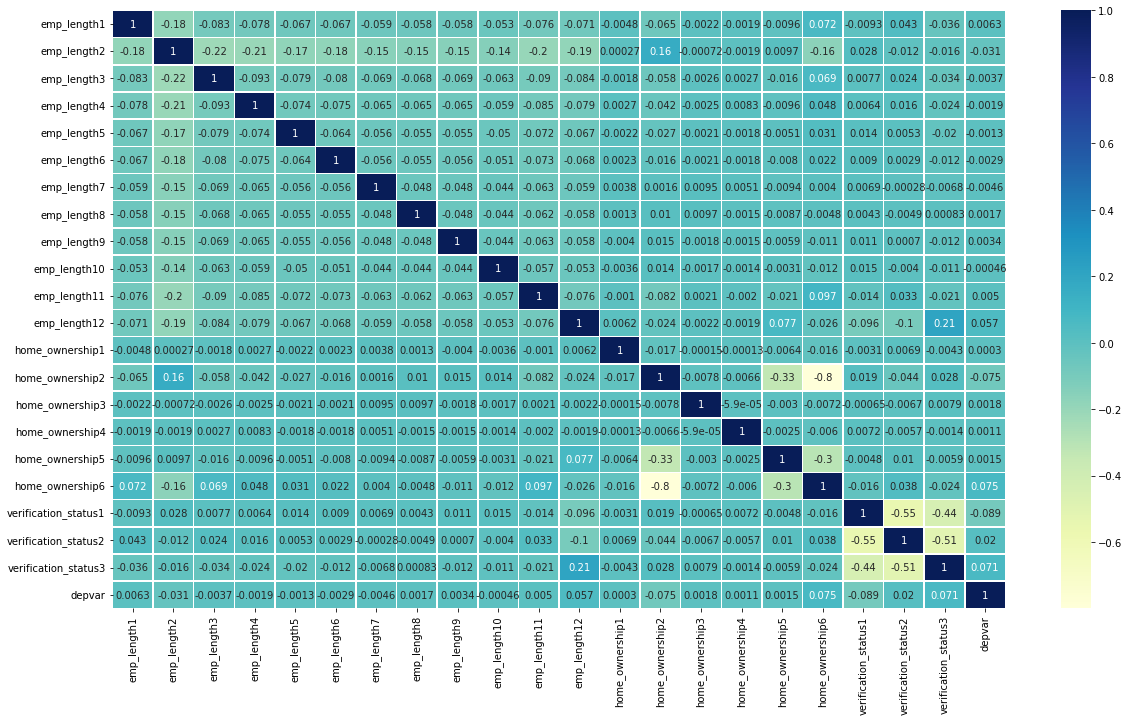

In [22]:
corr = dfvis2.corr()
plt.figure(figsize=(20,11))
ax = sns.heatmap(corr,cmap="YlGnBu", linewidths=.5, annot=True )
plt.yticks(rotation=0)
plt.show()

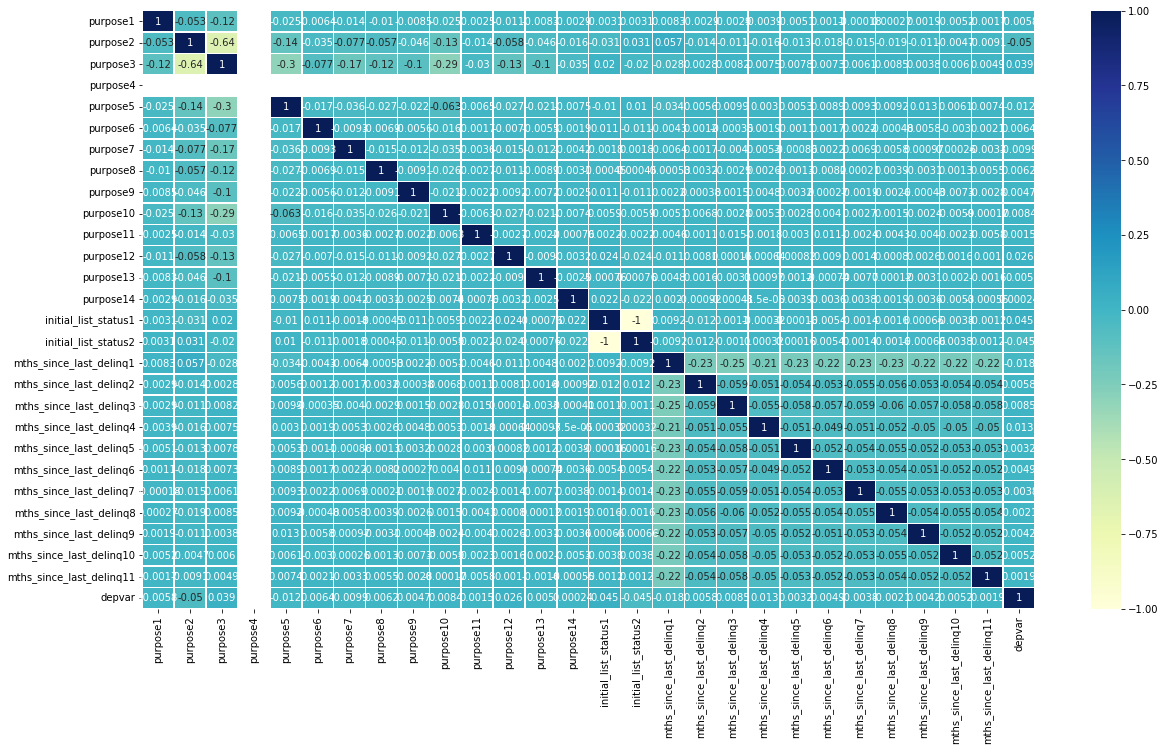

In [23]:
corr = dfvis3.corr()
plt.figure(figsize=(20,11))
ax = sns.heatmap(corr,cmap="YlGnBu", linewidths=.5, annot=True )
plt.yticks(rotation=0)
plt.show()

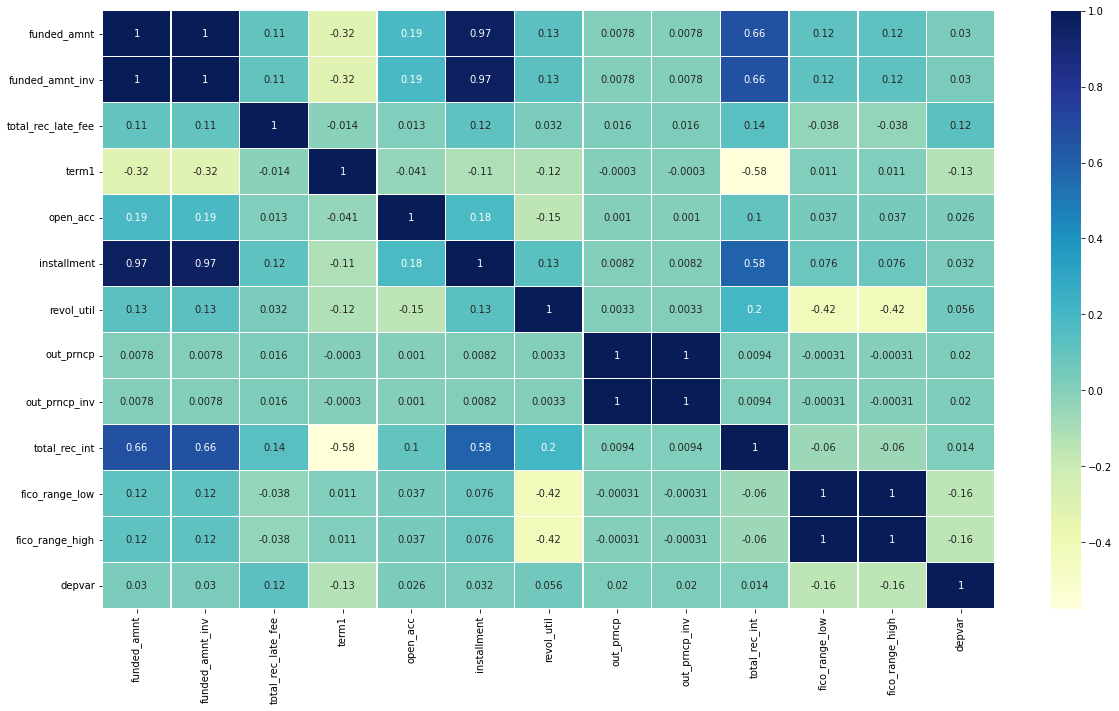

In [24]:
corr = dfvis4.corr()
plt.figure(figsize=(20,11))
ax = sns.heatmap(corr,cmap="YlGnBu", linewidths=.5, annot=True )
plt.yticks(rotation=0)
plt.show()

# Train Valid Split

In [ ]:
X = df.drop('depvar', axis=1)
y = df['depvar']

In [ ]:
# data를 training set과 validation set으로 나누기
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [ ]:
# training set과 validation set의 데이터 수 확인
print('training set length :', len(X_train))
print('validation set length :', len(X_valid))

training set length : 80000
validation set length : 20000


In [ ]:
# validation set의 라벨 비율 확인
y_valid.sum()/len(y_valid)

0.3263

# Single Model(XGBoost)
## XGBClassifier의 하이퍼 파라미터 설명
- **LINK** : https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier
- **max_depth=3** : 디시전 트리의 최대 깊이
- **learning_rate=0.1** : 0과 1 사이의 값을 가지는 부스팅에 대한 학습률(eta). 매 부스팅 단계 이후 새로이 추가된 가중치는 이 파라미터로 조정된다. 이 값이 낮을수록 보수적이며, 수렴에 필요한 더 많은 디시전 트리가 필요하다.
- **n_estimators=100** : 라운드의 횟수 또는 부스팅된 디시전 트리의 개수
- **silent=True** : 부스팅의 수행 동안 메시지를 출력할지에 대한 여부
- **objective="reg:linear"** : 모델이 학습할 작업의 분류, 미리 정의된 작업은 문자열로 지정이 가능하지만, 그렇지 않은 경우 콜러블callable을 만들어서 지정할 수도 있다.
- **booster="gbtree"** : 'gbtree', 'gblinear', 'dart'일 수 있다. 'dart'는 드롭아웃(dropout)이라는 특성을 추가한다(과적합 방지를 위해 무작위로 디시전 트리를 선택해 제거(드롭)한다). 'gblinear'는 정규화된 선형 모델을 만든다(디시전 트리가 아니라 라소 회귀와 유사하다).
- **nthread=None** : 더 이상 사용되지 않는다.
- **n_jobs** : 사용할 스레드의 개수
- **gamma=0** : 노드 분할에 필요한 최소 손실 감소
- **min_child_weight=1** : 자식 노드 생성에 필요한 헤시안(hessian) 합의 최솟값
- **max_delta_step=0** : 보다 보수적으로 갱신을 수행하도록 만드는 값. 불균형 범주의 데이터셋에 대해서는 1부터 10까지의 값으로 설정한다.
- **subsample=1** : 부스팅에 사용할 샘플의 비율
- **colsample_bytree=1** : 부스팅에 사용할 특징 열의 비율
- **colsample_bylevel=1** : 각 디시전 트리의 수준별 사용할 특징 열의 비율
- **colsample_bynode=1** : 각 디시전 트리의 노드별 사용할 특징 열의 비율
- **reg_alpha=0** : L1 정규화(가중치의 평균). 이 값이 클수록 보수적이게 된다.
- **reg_lambda=1** : L2 정규화(가중치의 제곱근). 이 값이 클수록 보수적이게 된다.
- **base_score=.5** : 초기 편향치(bias)
- **seed=None** : 더 이상 사용되지 않는다.
- **random_state=0** : 난수 생성 시드
- **missing=None** : 누락된 데이터가 해석될 값. None은 np.nan을 의미한다.
- **importance_type='gain'** : 특징 중요도의 유형. 'gain', 'weight', 'cover', 'total_gain', 'total_cover'로 설정될 수 있다.

In [ ]:
# 하이퍼 파라미터 튜닝
xgb_clf = xgboost.XGBClassifier()

param_grid = {'max_depth':[5],
              'n_estimators': list(range(150,300,10))}

cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2)

grid_search = GridSearchCV(estimator=xgb_clf,
                           param_grid=param_grid, 
                           n_jobs=-1,
                           cv=cv,
                           scoring='accuracy', 
                           error_score=0) 

results=grid_search.fit(X_train, y_train)

results.best_params_

{'max_depth': 5, 'n_estimators': 290}

In [ ]:
# best parameter를 사용하여 prediction 수행
xgb_clf = xgboost.XGBClassifier(max_depth = results.best_params_['max_depth'],
                                n_estimators = results.best_params_['n_estimators'],
                                eval_metric='mlogloss')

xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_valid)

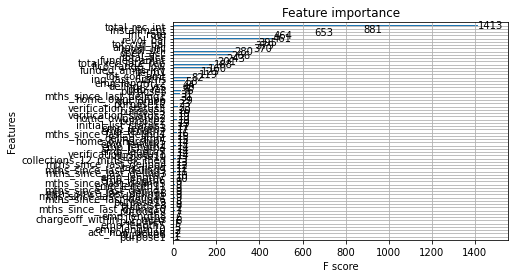

In [ ]:
import xgboost as xgb

xgb.plot_importance(xgb_clf)

In [ ]:
# y_valid가 0 또는 1일 확률 출력
y_pred_prob = xgb_clf.predict_proba(X_valid)

print(len(y_pred_prob))
y_pred_prob

20000


array([[0.94704014, 0.05295987],
       [0.8450413 , 0.1549587 ],
       [0.9418128 , 0.05818719],
       ...,
       [0.506757  , 0.49324298],
       [0.3173554 , 0.6826446 ],
       [0.72451305, 0.27548695]], dtype=float32)

In [ ]:
# y_valid가 1일 확률 출력
y_pred_prob[:,1]

array([0.05295987, 0.1549587 , 0.05818719, ..., 0.49324298, 0.6826446 ,
       0.27548695], dtype=float32)

In [ ]:
# y_valid 예측값 출력
# y_pred_prob[:,1]이 0.5(threshold)보다 큰 경우 1의 예측값을 return한다

print(len(y_pred_xgb))
y_pred_xgb

20000


array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
# 1로 예측된 y_valid 갯수 및 비율 출력
print(y_pred_xgb.sum())
print(y_pred_xgb.sum()/len(y_pred_xgb))

3391
0.16955


In [ ]:
# 평가 함수 정의
def get_clf_eval(y_actual, y_pred):
    accuracy = accuracy_score(y_actual, y_pred)
    precision = precision_score(y_actual, y_pred)
    recall = recall_score(y_actual, y_pred)
    AUC = roc_auc_score(y_actual, y_pred)
    F1 = f1_score(y_actual, y_pred)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('AUC: {:.4f}'.format(AUC))
    print('F1: {:.4f}'.format(F1))
    
    sns.heatmap(confusion_matrix(y_actual, y_pred), annot=True, fmt='d', cmap='YlGnBu')


정확도: 0.7502
정밀도: 0.6640
재현율: 0.4746
AUC: 0.6791
F1: 0.5535


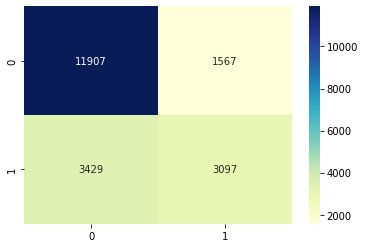

In [ ]:
# xgboost 성능 확인
get_clf_eval(y_valid, y_pred_xgb)


정확도: 0.7399
정밀도: 0.6191
재현율: 0.5273
AUC: 0.6851
F1: 0.5695


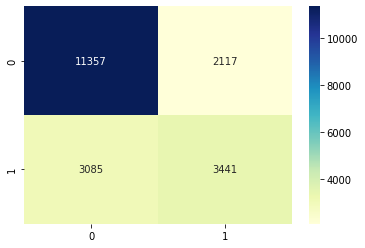

In [ ]:
# threshold 변경 및 성능 확인
get_clf_eval(y_valid, y_pred_prob[:,1]>0.4)

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
import torch.nn as nn

In [ ]:

clf = TabNetClassifier(cat_idxs=cat_idxs,
                    cat_dims=cat_dims,
                    cat_emb_dim=10,
                    optimizer_fn=torch.optim.Adam,
                    optimizer_params=dict(lr=1e-2),
                    scheduler_params={"step_size":50,
                                        "gamma":0.9},
                    scheduler_fn=torch.optim.lr_scheduler.StepLR,
                    mask_type='sparsemax' # "sparsemax", entmax
                    )


In [ ]:
max_epochs = 15

clf.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_name=['train', 'valid'],
    eval_metric=['auc'],
    max_epochs=max_epochs , patience=20,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False,
)

# Ensemble(Voting)

In [ ]:
rnd_clf = RandomForestClassifier()
lgbm_clf = LGBMClassifier()
# rid_clf = RidgeClassifier()
# dtc_clf = DecisionTreeClassifier()
# svm_clf = SVC()
# ada_clf = AdaBoostClassifier()
# gbc_clf = GradientBoostingClassifier()
# bag_clf = BaggingClassifier()
# ext_clf = ExtraTreesClassifier()
# knn_clf = KNeighborsClassifier()
# svc_clf = SVC()


voting_clf = VotingClassifier(estimators=[('rnd', rnd_clf), ('lgbm', lgbm_clf), ('xgb', xgb_clf)], voting='soft')


정확도: 0.7495
정밀도: 0.6779
재현율: 0.4425
AUC: 0.6704
F1: 0.5355


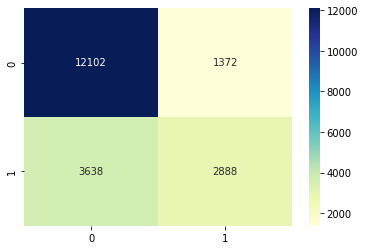

In [ ]:
for clf in (rnd_clf, lgbm_clf, xgb_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred_vote = clf.predict(X_valid)

# ensemble(voting) 성능 확인
get_clf_eval(y_valid, y_pred_vote)

# Ensemble(Stacking)


정확도: 0.7500
정밀도: 0.6486
재현율: 0.5103
AUC: 0.6882
F1: 0.5712


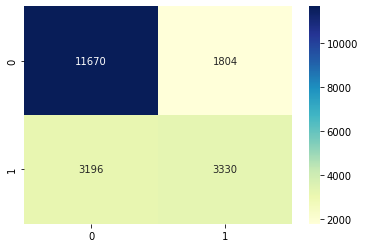

In [ ]:
stacking_clf = StackingClassifier(estimators=[('rnd', rnd_clf), ('lgbm', lgbm_clf), ('xgb', xgb_clf)], final_estimator = LGBMClassifier())
stacking_clf.fit(X_train, y_train)
y_pred_stack = stacking_clf.predict(X_valid)

# ensemble(stacking) 성능 확인
get_clf_eval(y_valid, y_pred_stack)

# Submission

In [ ]:
folder = '/content/drive/MyDrive/Colab Notebooks/ML study/day27 220126'
# 제출 양식 다운로드
submit = pd.read_csv(os.path.join(folder, 'sample_submission.csv'))

# prediction 수행
df_test = pd.read_csv(os.path.join(folder, 'test.csv'))
submit['answer'] = xgb_clf.predict(df_test.drop(columns=['ID']))

# 제출 파일 저장
submit.to_csv(os.path.join(folder, 'prediction.csv'), index=False)